Topics to be covered

- Pytorch installation
- Creating pytorch tensors 
- Numpy to pytorch tensor and vice versa
- Resizing
- Autograd function 
- Understanding dot product and matrix multplication by doing forward propagation
- Pytorch broadcasting

### Pytorch installation

https://pytorch.org/get-started/locally/

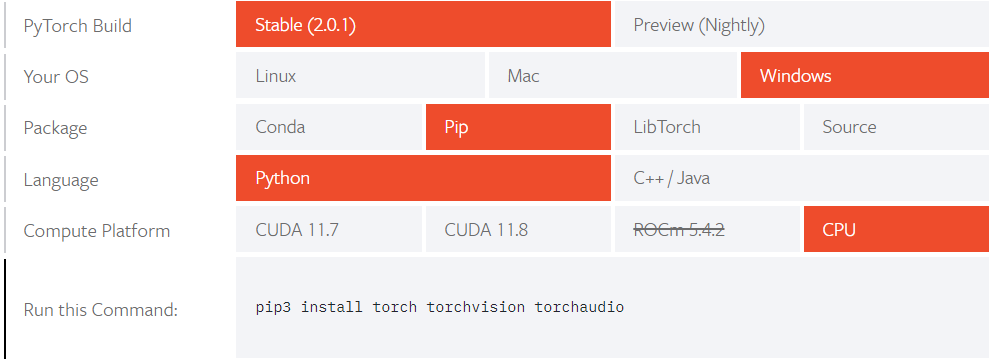

- Run the below command to install the pytorch version for cpu

<B> ! pip3 install torch torchvision torchaudio </B>

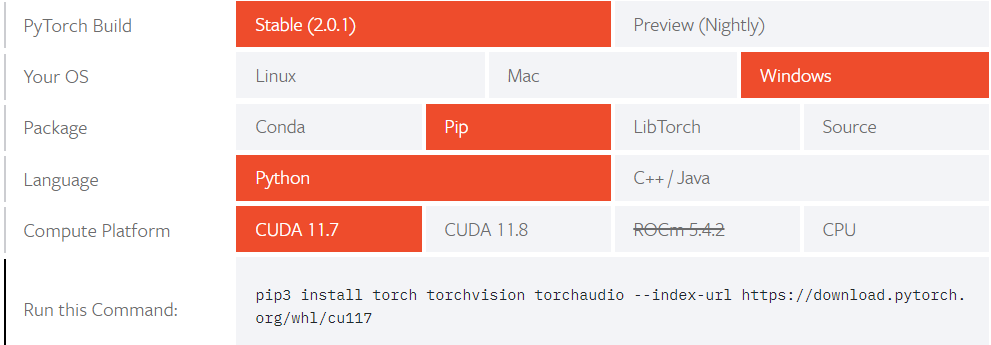

- Run the below command to install the pytorch version for GPU

<B> ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117 </B>

In [54]:
import torch #import the library

In [55]:
# Create tensor
t = torch.tensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [56]:
t.shape # check the shape of the tensor

torch.Size([2, 3])

In [57]:
t.ndim # no of dimensions in the tensor

2

In [58]:
t.t() # transpose

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [59]:
# Create tensor of zeros
z = torch.zeros(3, 3)
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

## Numpy Support:
You can easily create a tensors from an ndarray and vice versa. These operations are fast, since the data of both structures will share the same memory space, and so no copying is involved.

In [60]:
# Numpy to torch tensor

import numpy as np

n = np.random.randn(1, 2)
t = torch.from_numpy(n)
print(t)
print(type(n))
print(type(t))

tensor([[ 1.4052, -1.1655]], dtype=torch.float64)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [61]:
n.shape

(1, 2)

In [62]:
# Tensor to numpy

n1 = t.numpy()
print(n1)
print(type(n1))

[[ 1.40521943 -1.16552166]]
<class 'numpy.ndarray'>


## Resizing: 
If you want to resize/reshape tensor, you can use torch.view:

In [63]:
x = torch.randn(2, 2)

In [64]:
x

tensor([[ 0.7655, -0.3377],
        [-0.8079,  0.3886]])

In [65]:
print('Shape of x:',x.shape)

print('\n # of dimensions in x:',x.ndim)

Shape of x: torch.Size([2, 2])

 # of dimensions in x: 2


In [66]:
y = x.view(4)
print(y)

tensor([ 0.7655, -0.3377, -0.8079,  0.3886])


In [67]:
print('\n shape of the y:',y.shape)

print('\n # of dimensions in y:',y.ndim)


 shape of the y: torch.Size([4])

 # of dimensions in y: 1


In [68]:
z = x.view(-1, 2)  # the size -1 is inferred from other dimensions

print(z)

tensor([[ 0.7655, -0.3377],
        [-0.8079,  0.3886]])


In [69]:
print('\n shape of the z:',z.shape)

print('\n # of dimensions in z:',z.ndim)


 shape of the z: torch.Size([2, 2])

 # of dimensions in z: 2


### Autograd:
- torch.autograd provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. 

- It requires minimal changes to the existing code - you only need to declare Tensors for which gradients should be computed with the requires_grad=True keyword.

In [70]:
from torch.autograd import Variable
#a = Variable(torch.Tensor([[1,2],[3,4]]), requires_grad=True)

a = torch.tensor([[1.0,2.0],[3.0,4.0]], requires_grad=True)

print(a)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [71]:
y = torch.sum(a**3) # 1 + 8 + 27 + 64
print(y)

tensor(100., grad_fn=<SumBackward0>)


- gradients will be calculated when we will call the .backward() method 

- grad.data will store the gradients 

In [72]:
y.backward()       # compute gradients of y wrt a
print(a.grad.data)      # print dy/da_ij = 3*a_ij^2 for a_11, a_12, a21, a22

tensor([[ 3., 12.],
        [27., 48.]])


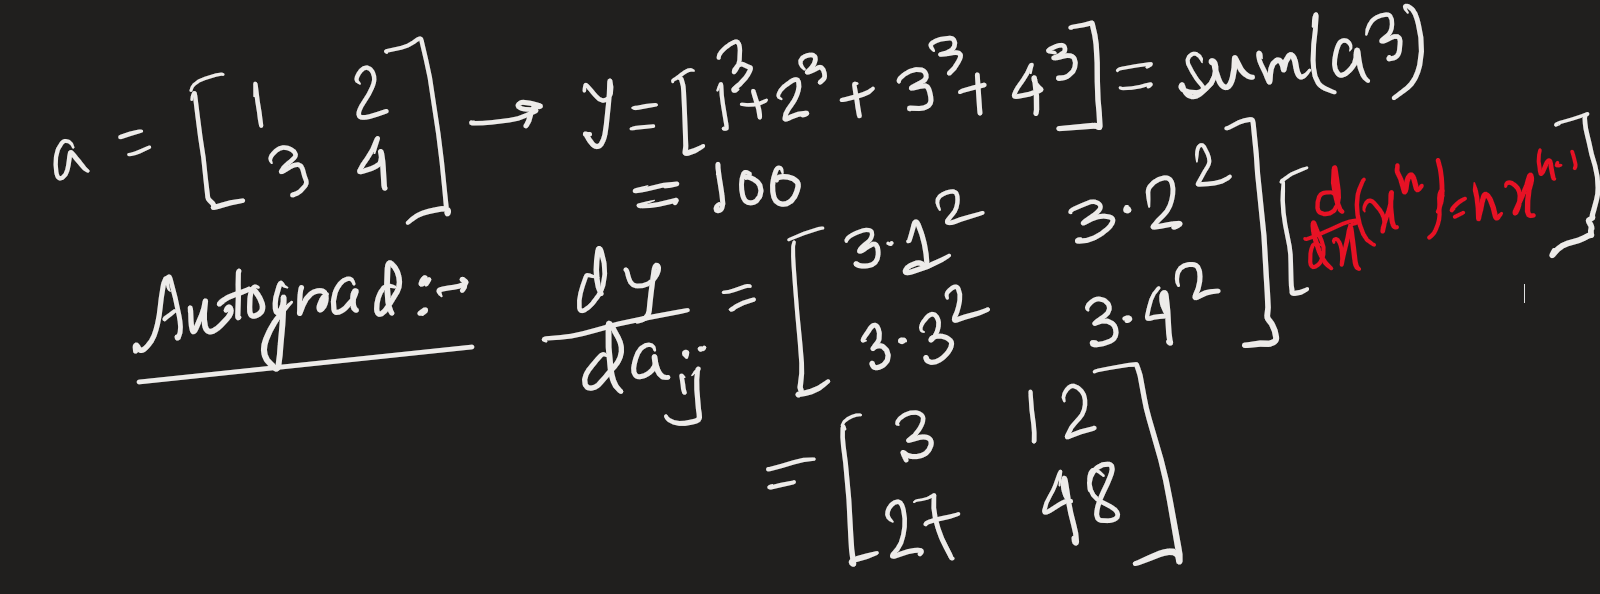

## Simple Neaural Network Feedforward:

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

we need to do dot/inner proudct between the input data with set of weights and then add the bias.
Then we pass it through an activation function.

In [73]:
torch.manual_seed(2) # setting random seed for reproducability

In [74]:
X = torch.randn((2, 5)) # 2,5 random normal input featutres/tensor
w = torch.rand_like(X) # weights with same dimension as features
b = torch.randn(1,1) # bias unit

In [75]:
# Sigmoid activation function

def sigmoid(i):
    return 1/(1+torch.exp(-i))

In [76]:
# To check the shape of the tensor
w.shape

torch.Size([2, 5])

In [77]:
X.shape

torch.Size([2, 5])

As you might have guessed we cannot straightaway do - dot product of X and w as the inner dimnesions do not match here.We need the weight tensor to be a 5,2 tensor. 

- View function can help us to do that.
- or we can do transpose of the w

In [78]:
w.view(5,2).shape , w.T.shape

(torch.Size([5, 2]), torch.Size([5, 2]))

### Pytorch dot product

Unlike NumPy’s dot, torch.dot intentionally only supports computing the dot product of two 1D tensors with the same number of elements.

https://pytorch.org/docs/stable/generated/torch.dot.html#torch-dot

In [79]:
y = sigmoid((torch.dot(w,X.T)+b))
y

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [80]:
a = torch.tensor([2, 3])
b = torch.tensor([2, 1])
torch.dot(a, b)

tensor(7)

### Pytorch Matrix Multiplication
https://pytorch.org/docs/stable/generated/torch.mm.html#torch-mm

In [81]:
z = torch.mm(X,w.T)+b
y = sigmoid(z)
y # showing output from single layer

tensor([[0.7677, 0.7462],
        [0.8459, 0.6545]])

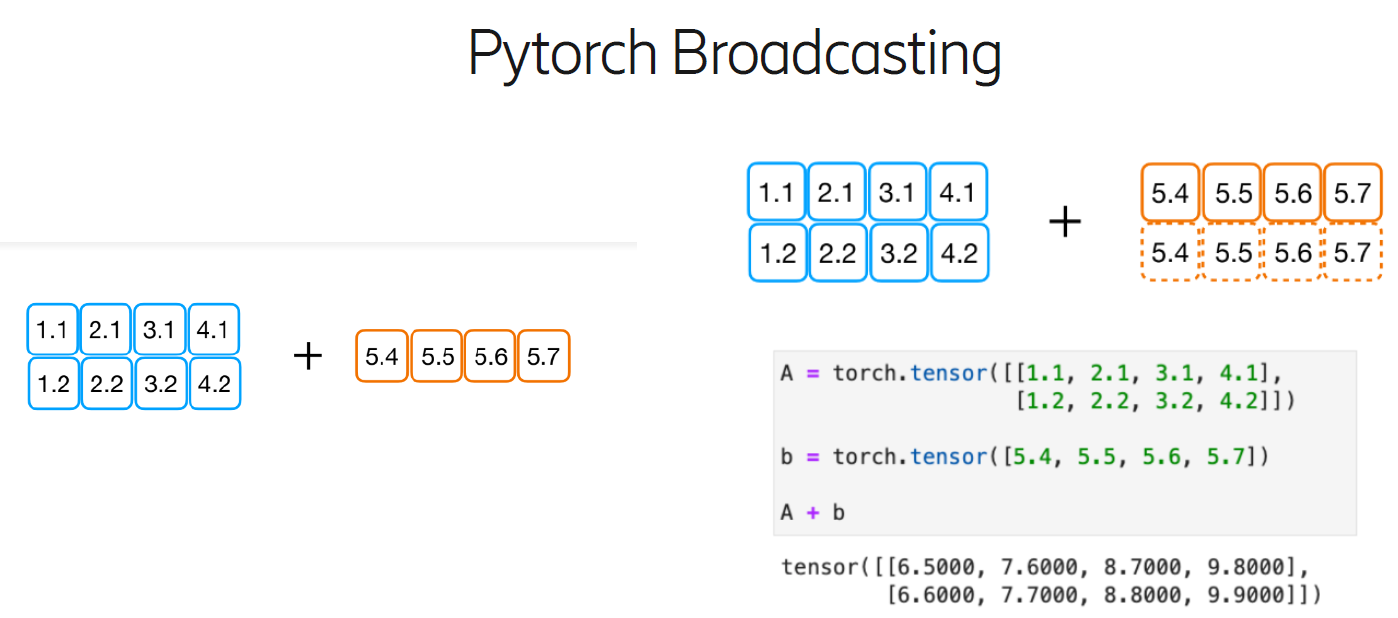